1.1 Defining the Question

Unsupervised Machine Learning Project to understand the customer characteristics of Kira Plastinina. 

1.2 The Context

Kira Plastinina is a Russian brand that is sold through a defunct chain of retail stores in Russia, Ukraine, Kazakhstan, Belarus, China, Philippines, and Armenia. The brand’s Sales and Marketing team would like to understand their customer’s behavior from data that they have collected over the past year. More specifically, they would like to learn the characteristics of customer groups.

Perform clustering stating insights drawn from your analysis and visualizations.

Upon implementation, provide comparisons between the approaches learned this week i.e. K-Means clustering vs Hierarchical clustering highlighting the strengths and limitations of each approach in the context of your analysis. 

1.3 Metrics for Success

Clustering the data to maximize reaching the target audience.

1.1.4 Experimental Design Taken

Problem Definition
Data Sourcing
Check the Data
Perform Data Cleaning
Perform Exploratory Data Analysis (Univariate, Bivariate & Multivariate)
Implement the Solution
Challenge the Solution
Follow up Questions

1.1.5 Appropriateness of the Data

The dataset consists of 10 numerical and 8 categorical attributes. The 'Revenue' attribute can be used as the class label.

"Administrative", "Administrative Duration", "Informational", "Informational Duration", "Product Related" and "Product Related Duration" represents the number of different types of pages visited by the visitor in that session and total time spent in each of these page categories. The values of these features are derived from the URL information of the pages visited by the user and updated in real-time when a user takes an action, e.g. moving from one page to another.

The "Bounce Rate", "Exit Rate" and "Page Value" features represent the metrics measured by "Google Analytics" for each page in the e-commerce site.
The value of the "Bounce Rate" feature for a web page refers to the percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other requests to the analytics server during that session.

The value of the "Exit Rate" feature for a specific web page is calculated as for all pageviews to the page, the percentage that was the last in the session.

The "Page Value" feature represents the average value for a web page that a user visited before completing an e-commerce transaction.

The "Special Day" feature indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with the transaction. The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date. For example, for Valentina’s day, this value takes a nonzero value between February 2 and February 12, zero before and after this date unless it is close to another special day, and its maximum value of 1 on February 8.

The dataset also includes the operating system, browser, region, traffic type, visitor type as returning or new visitor, a Boolean value indicating whether the date of the visit is weekend, and month of the year.

In [1]:
# loading our csv
customers = read.csv('online_shoppers_intention.csv')

In [2]:
# reading our first six rows
head(customers)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<int>,<int>,<int>,<int>,<fct>,<lgl>,<lgl>
1,0,0,0,0,1,0.000000,0.20000000,0.2000000,0,0,Feb,1,1,1,1,Returning_Visitor,FALSE,FALSE
2,0,0,0,0,2,64.000000,0.00000000,0.1000000,0,0,Feb,2,2,1,2,Returning_Visitor,FALSE,FALSE
3,0,-1,0,-1,1,-1.000000,0.20000000,0.2000000,0,0,Feb,4,1,9,3,Returning_Visitor,FALSE,FALSE
4,0,0,0,0,2,2.666667,0.05000000,0.1400000,0,0,Feb,3,2,2,4,Returning_Visitor,FALSE,FALSE
5,0,0,0,0,10,627.500000,0.02000000,0.0500000,0,0,Feb,3,3,1,4,Returning_Visitor,TRUE,FALSE
6,0,0,0,0,19,154.216667,0.01578947,0.0245614,0,0,Feb,2,2,1,3,Returning_Visitor,FALSE,FALSE


In [3]:
# Checking for the summary description of our data

summary(customers)

 Administrative   Administrative_Duration Informational   
 Min.   : 0.000   Min.   :  -1.00         Min.   : 0.000  
 1st Qu.: 0.000   1st Qu.:   0.00         1st Qu.: 0.000  
 Median : 1.000   Median :   8.00         Median : 0.000  
 Mean   : 2.318   Mean   :  80.91         Mean   : 0.504  
 3rd Qu.: 4.000   3rd Qu.:  93.50         3rd Qu.: 0.000  
 Max.   :27.000   Max.   :3398.75         Max.   :24.000  
 NA's   :14       NA's   :14              NA's   :14      
 Informational_Duration ProductRelated   ProductRelated_Duration
 Min.   :  -1.00        Min.   :  0.00   Min.   :   -1.0        
 1st Qu.:   0.00        1st Qu.:  7.00   1st Qu.:  185.0        
 Median :   0.00        Median : 18.00   Median :  599.8        
 Mean   :  34.51        Mean   : 31.76   Mean   : 1196.0        
 3rd Qu.:   0.00        3rd Qu.: 38.00   3rd Qu.: 1466.5        
 Max.   :2549.38        Max.   :705.00   Max.   :63973.5        
 NA's   :14             NA's   :14       NA's   :14             
  Bounce

In [4]:
# Checking the structure of our dataset

str(customers)

'data.frame':	12330 obs. of  18 variables:
 $ Administrative         : int  0 0 0 0 0 0 0 1 0 0 ...
 $ Administrative_Duration: num  0 0 -1 0 0 0 -1 -1 0 0 ...
 $ Informational          : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Informational_Duration : num  0 0 -1 0 0 0 -1 -1 0 0 ...
 $ ProductRelated         : int  1 2 1 2 10 19 1 1 2 3 ...
 $ ProductRelated_Duration: num  0 64 -1 2.67 627.5 ...
 $ BounceRates            : num  0.2 0 0.2 0.05 0.02 ...
 $ ExitRates              : num  0.2 0.1 0.2 0.14 0.05 ...
 $ PageValues             : num  0 0 0 0 0 0 0 0 0 0 ...
 $ SpecialDay             : num  0 0 0 0 0 0 0.4 0 0.8 0.4 ...
 $ Month                  : Factor w/ 10 levels "Aug","Dec","Feb",..: 3 3 3 3 3 3 3 3 3 3 ...
 $ OperatingSystems       : int  1 2 4 3 3 2 2 1 2 2 ...
 $ Browser                : int  1 2 1 2 3 2 4 2 2 4 ...
 $ Region                 : int  1 1 9 2 1 1 3 1 2 1 ...
 $ TrafficType            : int  1 2 3 4 4 3 3 5 3 2 ...
 $ VisitorType            : Factor w/ 3 levels "Ne

We have 18 columns and 12330 rows.
Th first 10 columns have numerical datatypes

DATA CLEANING

In [5]:
# Checking for Missing Values

colSums(is.na(customers))

Administrative Administrative_Duration           Informational 
                     14                      14                      14 
 Informational_Duration          ProductRelated ProductRelated_Duration 
                     14                      14                      14 
            BounceRates               ExitRates              PageValues 
                     14                      14                       0 
             SpecialDay                   Month        OperatingSystems 
                      0                       0                       0 
                Browser                  Region             TrafficType 
                      0                       0                       0 
            VisitorType                 Weekend                 Revenue 
                      0                       0                       0

We have missing values in 8 columns.
Since we have quite a number of rows, we will go ahead and drop these missing values as we will be left with enough data for our analysis.

In [6]:
# creating a new dataframe that does not have missing values

customers1 <- na.omit(customers)
head(customers1)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<int>,<int>,<int>,<int>,<fct>,<lgl>,<lgl>
1,0,0,0,0,1,0.000000,0.20000000,0.2000000,0,0,Feb,1,1,1,1,Returning_Visitor,FALSE,FALSE
2,0,0,0,0,2,64.000000,0.00000000,0.1000000,0,0,Feb,2,2,1,2,Returning_Visitor,FALSE,FALSE
3,0,-1,0,-1,1,-1.000000,0.20000000,0.2000000,0,0,Feb,4,1,9,3,Returning_Visitor,FALSE,FALSE
4,0,0,0,0,2,2.666667,0.05000000,0.1400000,0,0,Feb,3,2,2,4,Returning_Visitor,FALSE,FALSE
5,0,0,0,0,10,627.500000,0.02000000,0.0500000,0,0,Feb,3,3,1,4,Returning_Visitor,TRUE,FALSE
6,0,0,0,0,19,154.216667,0.01578947,0.0245614,0,0,Feb,2,2,1,3,Returning_Visitor,FALSE,FALSE


In [7]:
# confirming that we dont have missing values

colSums(is.na(customers1))


Administrative Administrative_Duration           Informational 
                      0                       0                       0 
 Informational_Duration          ProductRelated ProductRelated_Duration 
                      0                       0                       0 
            BounceRates               ExitRates              PageValues 
                      0                       0                       0 
             SpecialDay                   Month        OperatingSystems 
                      0                       0                       0 
                Browser                  Region             TrafficType 
                      0                       0                       0 
            VisitorType                 Weekend                 Revenue 
                      0                       0                       0

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



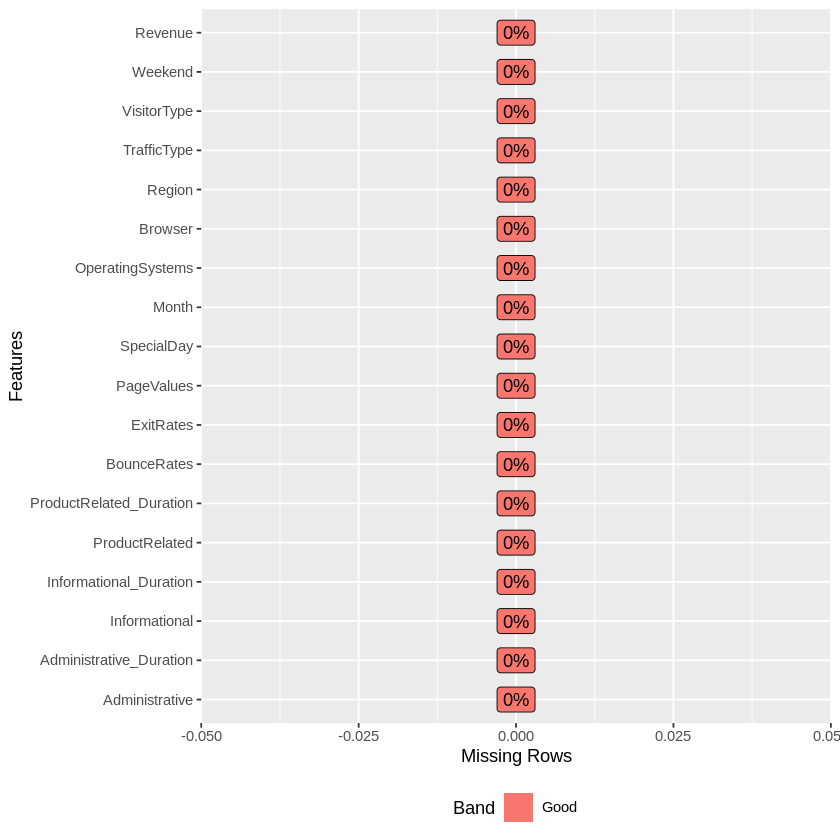

In [8]:
# checking if we have any remaining missing values

install.packages("DataExplorer")
library(DataExplorer)
plot_missing(customers1)


In [9]:
# Checking for duplicated data

duplicates <- customers1[duplicated(customers1),]

duplicates

anyDuplicated(customers1)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<int>,<int>,<int>,<int>,<fct>,<lgl>,<lgl>
159,0,0,0,0,1,0,0.2,0.2,0,0,Feb,1,1,1,3,Returning_Visitor,FALSE,FALSE
179,0,0,0,0,1,0,0.2,0.2,0,0,Feb,3,2,3,3,Returning_Visitor,FALSE,FALSE
419,0,0,0,0,1,0,0.2,0.2,0,0,Mar,1,1,1,1,Returning_Visitor,TRUE,FALSE
457,0,0,0,0,1,0,0.2,0.2,0,0,Mar,2,2,4,1,Returning_Visitor,FALSE,FALSE
484,0,0,0,0,1,0,0.2,0.2,0,0,Mar,3,2,3,1,Returning_Visitor,FALSE,FALSE
513,0,0,0,0,1,0,0.2,0.2,0,0,Mar,2,2,1,1,Returning_Visitor,FALSE,FALSE
555,0,0,0,0,1,0,0.2,0.2,0,0,Mar,2,2,1,1,Returning_Visitor,FALSE,FALSE
590,0,0,0,0,1,0,0.2,0.2,0,0,Mar,2,2,1,1,Returning_Visitor,FALSE,FALSE
660,0,0,0,0,2,0,0.2,0.2,0,0,Mar,2,5,1,1,Returning_Visitor,FALSE,FALSE


[1] 159

We have 159 duplicates in our dataset. We will go ahead and drop them.

In [10]:
# Removing these duplicated rows in the dataset

unique_cust <- customers1[!duplicated(customers1), ]
dim(unique_cust)

[1] 12199    18

We now have 12199 rows and 18 columns after dropping the missing values and the duplicates.

## Checking for outliers

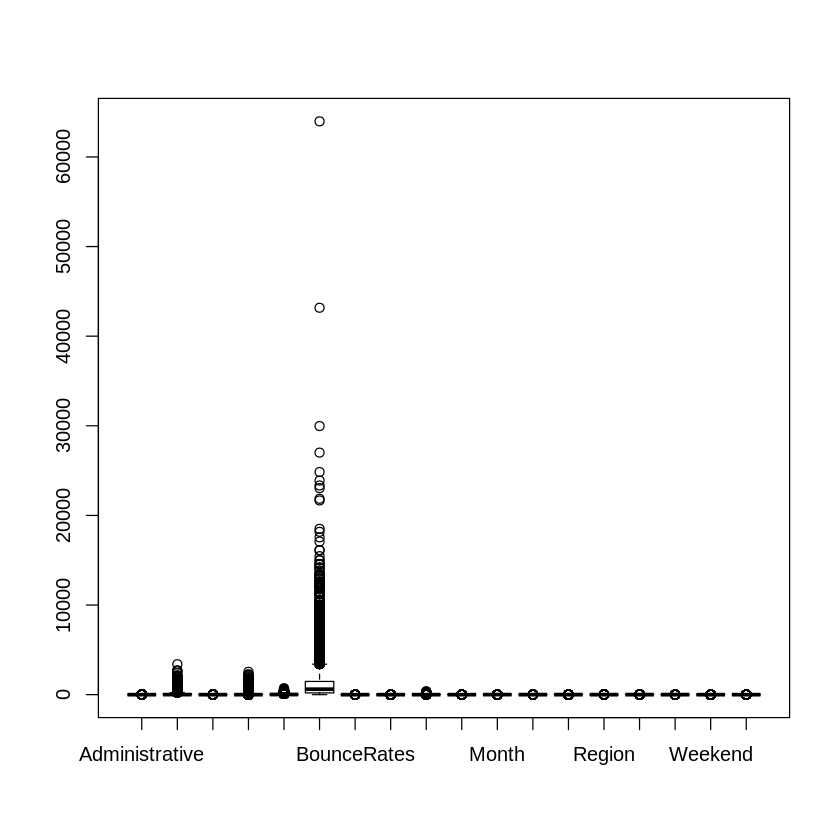

In [11]:
# Plot a boxplot to help us visualise any existing outliers 

boxplot(unique_cust)


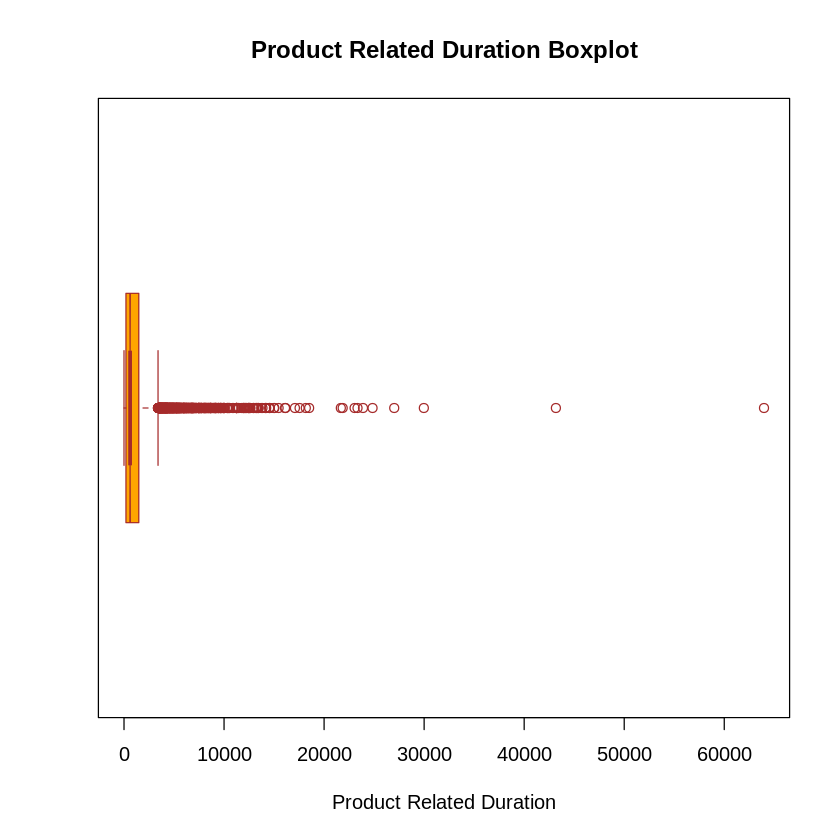

In [12]:
# plotting a boxplot for the product related duration outliers

boxplot(unique_cust$ProductRelated_Duration,
main = "Product Related Duration Boxplot",
xlab = "Product Related Duration",
col = "orange",
border = "brown",
horizontal = TRUE,
notch = TRUE
)

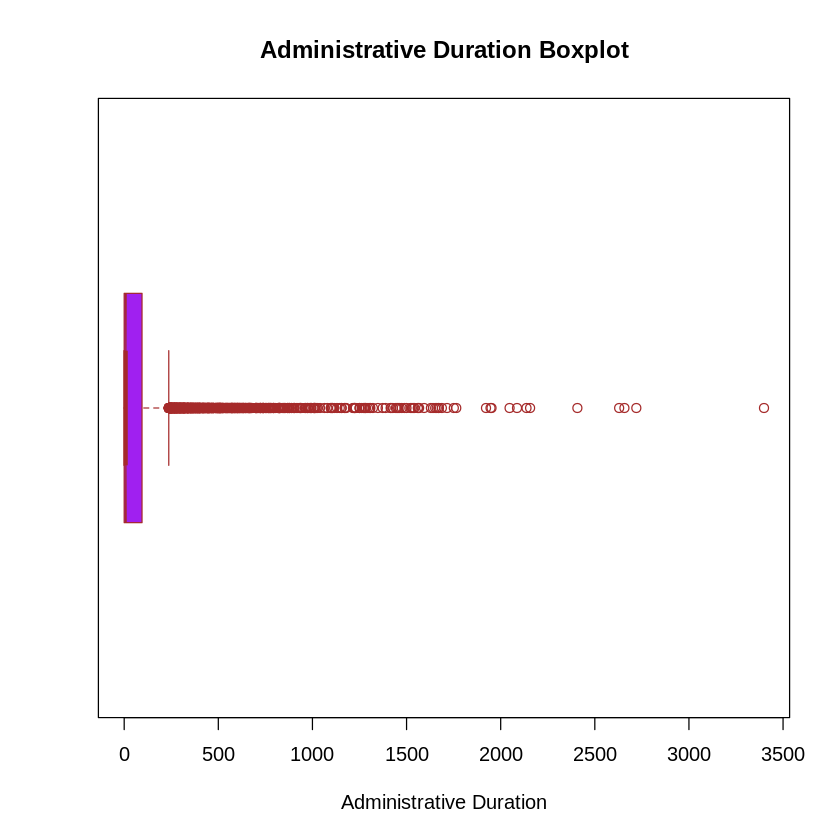

In [13]:
# plotting a boxplot for the administrative duration outliers

boxplot(unique_cust$Administrative_Duration,
main = "Administrative Duration Boxplot",
xlab = "Administrative Duration",
col = "purple",
border = "brown",
horizontal = TRUE,
notch = TRUE
)

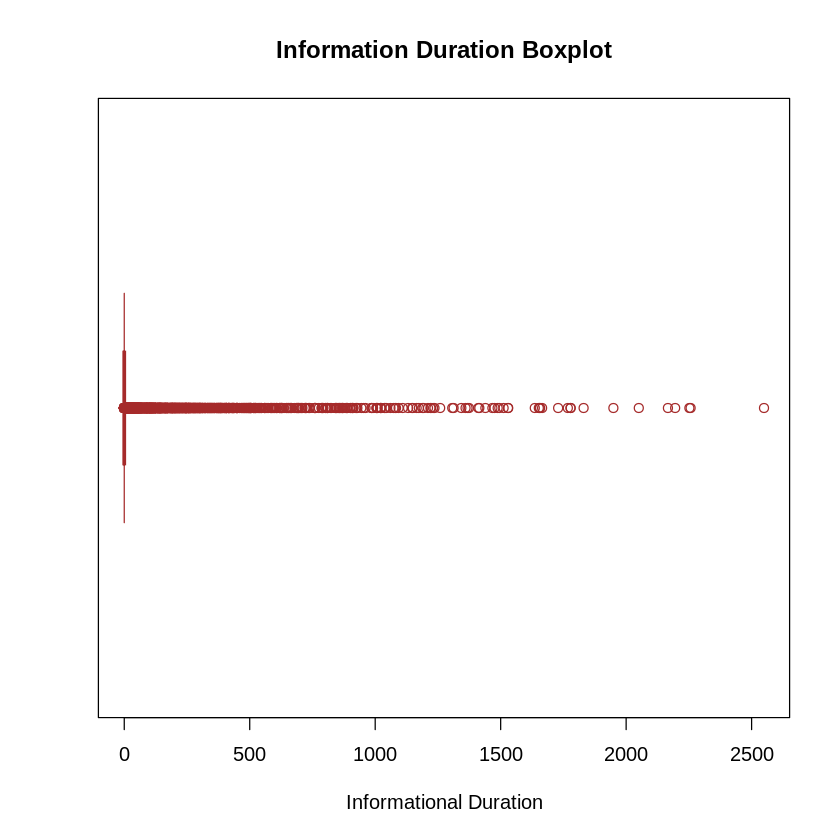

In [14]:
# plotting a boxplot for the administrative duration outliers

boxplot(unique_cust$Informational_Duration,
main = "Information Duration Boxplot",
xlab = "Informational Duration",
col = "gold",
border = "brown",
horizontal = TRUE,
notch = TRUE
)

We have outliers in several of our numerical columns. We shall not delete the outliers as they will result in us losing so much customer data which could alter our analysis.

DATA ANALYSIS

Analysing the columns.

In [15]:
# different types of pages visited by the visitor in that session
pages_visited <- unique_cust[, c(1,2,3,4,5,6)]
names(pages_visited)

[1] "Administrative"          "Administrative_Duration"
[3] "Informational"           "Informational_Duration" 
[5] "ProductRelated"          "ProductRelated_Duration"

In [16]:
# metrics measured by "Google Analytics" for each page in the e-commerce site. 
metrics <- unique_cust[, c(7,8,9)]
names(metrics)

[1] "BounceRates" "ExitRates"   "PageValues"

EDA

Univariate Analysis

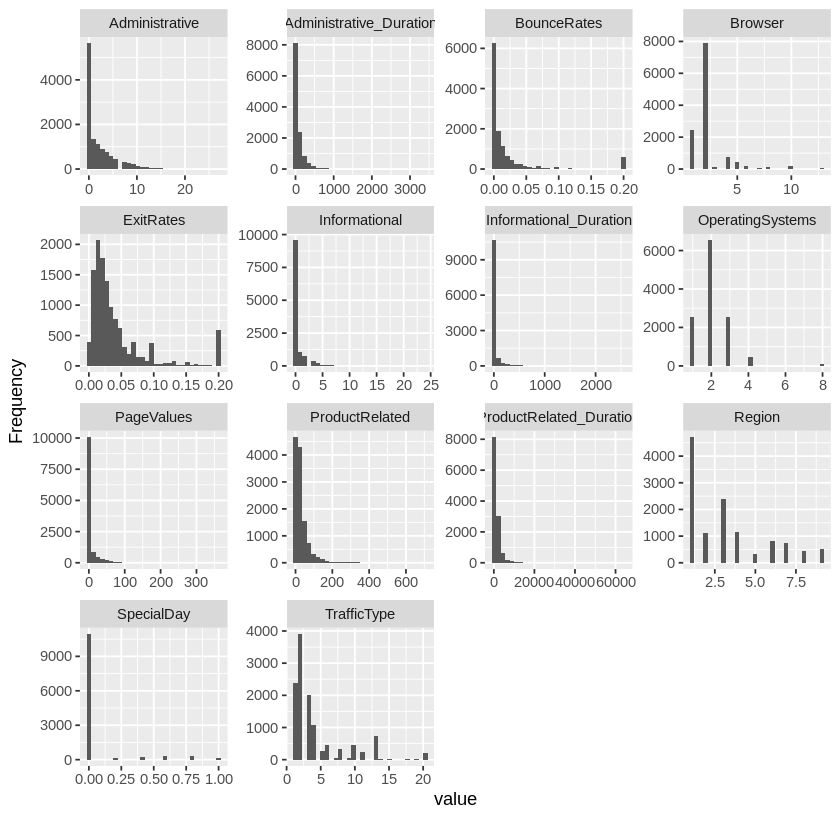

In [17]:
# Plotting all histograms in the continuous variables in our data 

plot_histogram(unique_cust)


From the histograms, most of our variables are positively skewed.

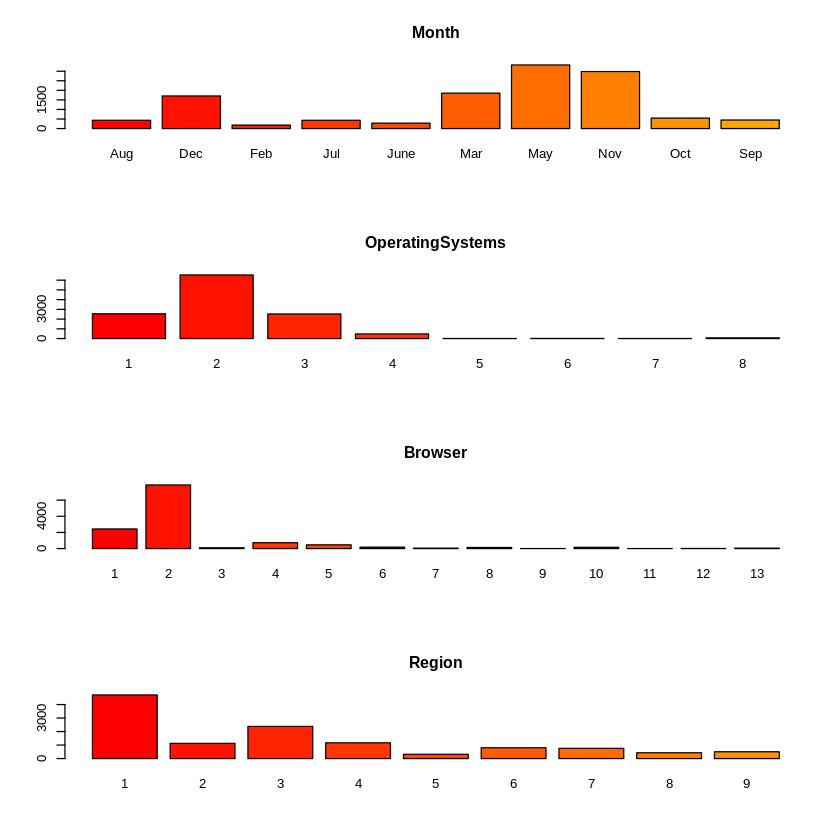

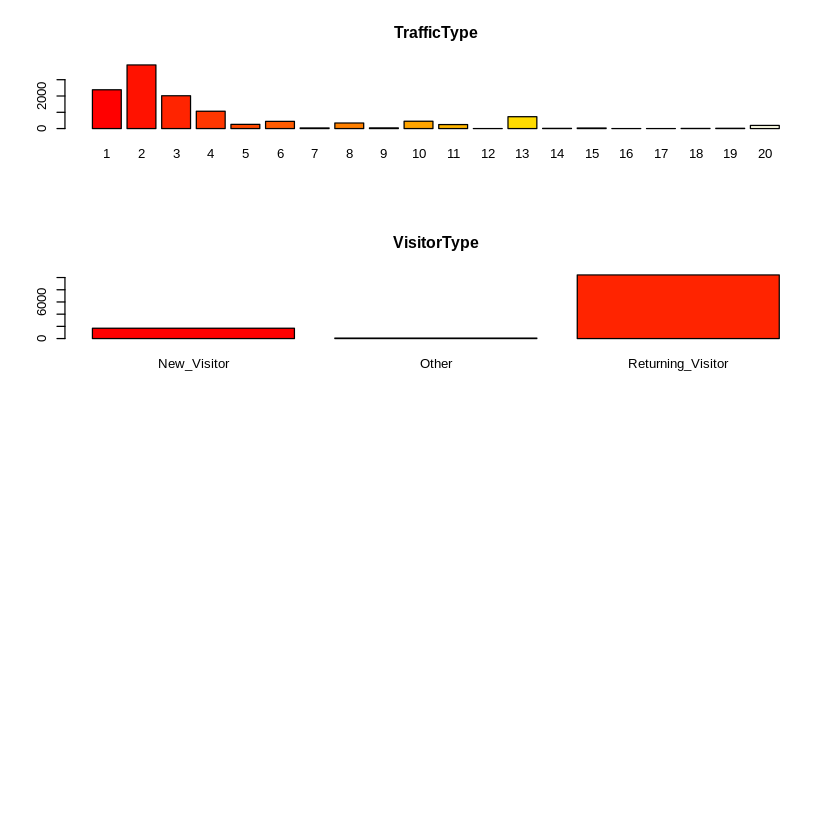

In [18]:
# Bar plots of the categorical/factor modes variables
par(mfrow=c(4,1))
for(i in 11:16) {
	counts <- table(unique_cust[,i])
	name <- names(unique_cust)[i]
	barplot(counts, main=name, col = heat.colors(20))}


From the bar plots we take note of the following:

Mayand November received very high traffic of customers, Feb received the least traffic of customers.
Operating systems 2, 1 and 3 were mostly used by customers.
Browser 2 and 1 were the most commonly used for browsing.
Region 1 had the most activity, region 5 was least active.
Traffic type 2, 1 and 3 were heavily used respectively.
Most vistors were returning visitors.



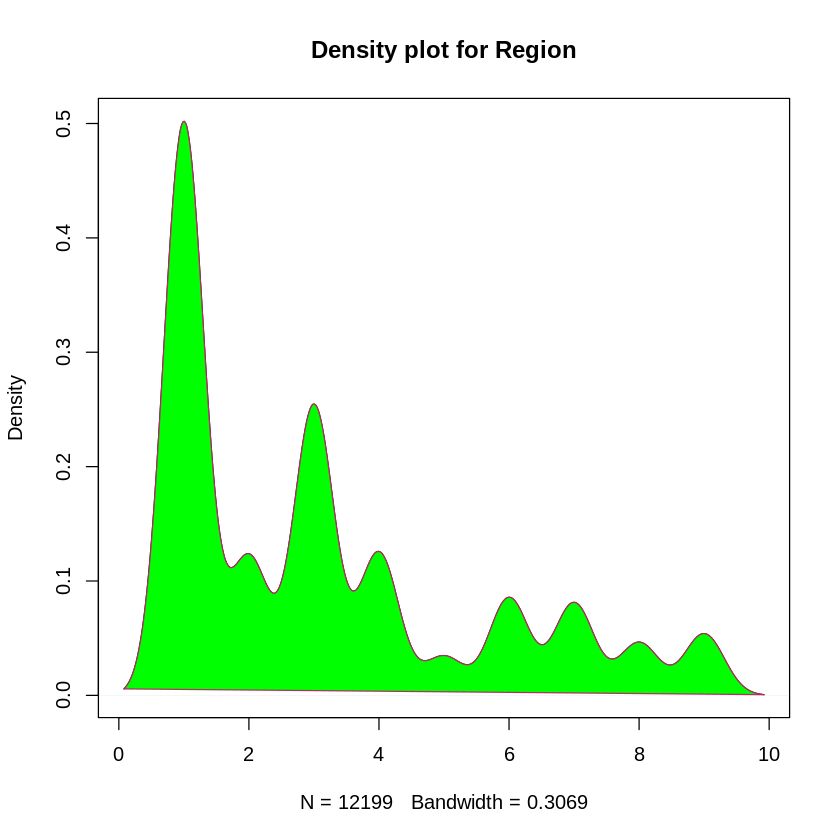

In [19]:
# kernel density plot
a <- density(unique_cust$Region)
plot(a, main = "Density plot for Region")
polygon(a, col = "green", border = "maroon")

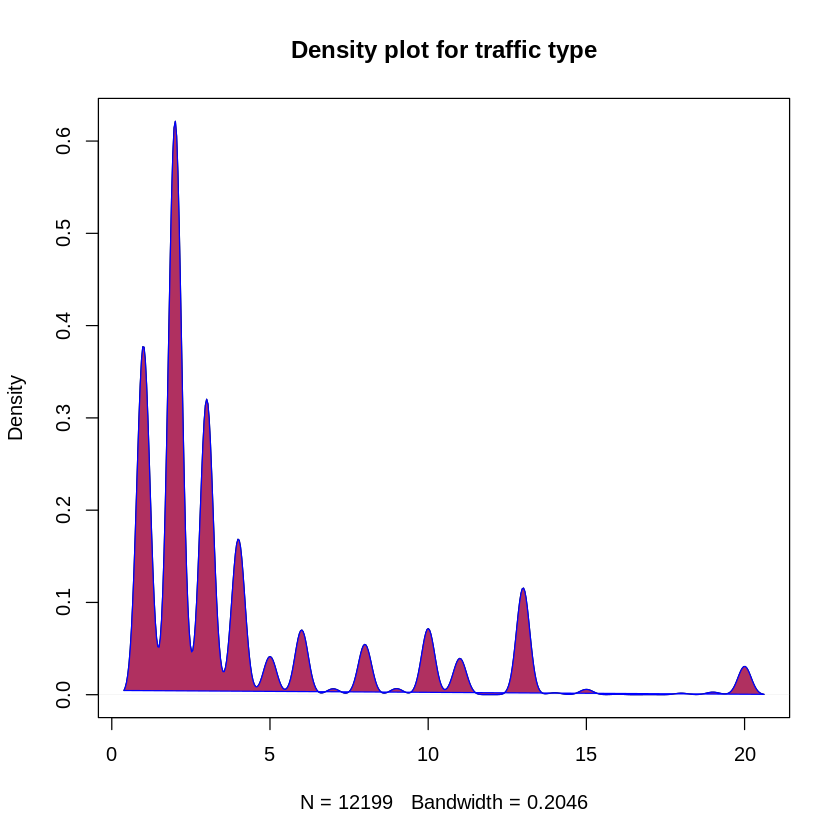

In [20]:
# kernel density plot
a <- density(unique_cust$TrafficType)
plot(a, main = "Density plot for traffic type")
polygon(a, col = "maroon", border = "blue")

Bivariate Analysis

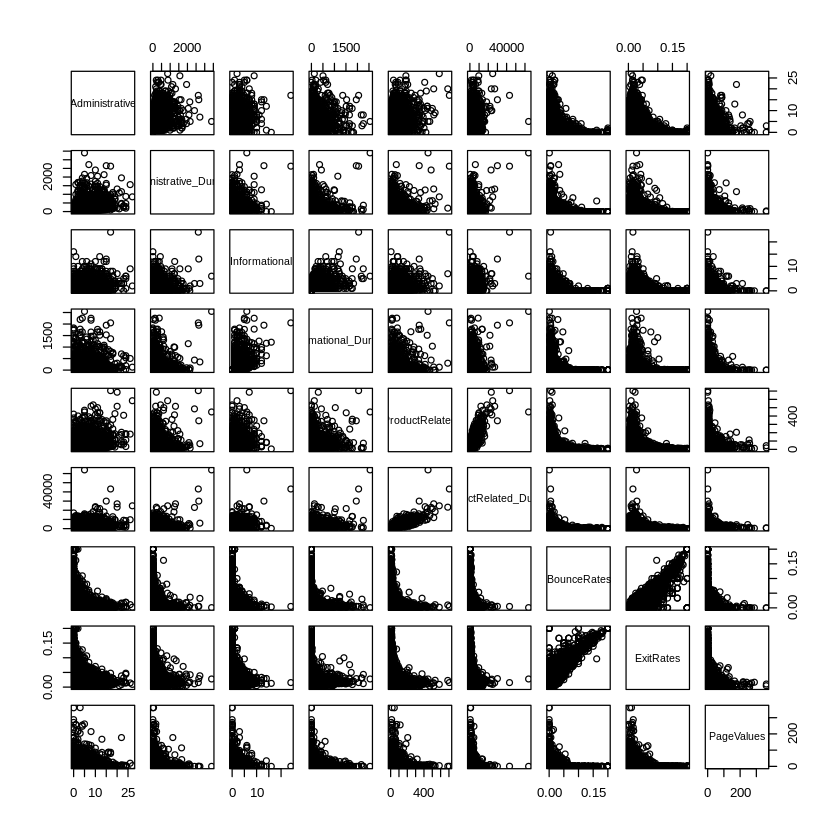

In [21]:
# Pair plots for the continous variables
pairs(unique_cust[,1:9])

In [22]:
# Correlations

# subseting our dataframe to getthe numeric variables
numerics <- unique_cust[, c(1:10)]

# getting the correlation between these numeric variables
numerics.cor <- cor(numerics)
numerics.cor


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay
Administrative,1.00000000,0.60040965,0.37528761,0.25478602,0.42819151,0.37102722,-0.21366664,-0.3112741,0.09692097,-0.09707210
Administrative_Duration,0.60040965,1.00000000,0.30143630,0.23718986,0.28678391,0.35351379,-0.13733340,-0.2020245,0.06616837,-0.07473689
Informational,0.37528761,0.30143630,1.00000000,0.61867795,0.37260472,0.38608372,-0.10950530,-0.1595668,0.04739015,-0.04937677
Informational_Duration,0.25478602,0.23718986,0.61867795,1.00000000,0.27906195,0.34658069,-0.07015947,-0.1029327,0.03006416,-0.03129304
ProductRelated,0.42819151,0.28678391,0.37260472,0.27906195,1.00000000,0.86030819,-0.19351577,-0.2861632,0.05411549,-0.02593062
ProductRelated_Duration,0.37102722,0.35351379,0.38608372,0.34658069,0.86030819,1.00000000,-0.17437550,-0.2453340,0.05084062,-0.03821065
BounceRates,-0.21366664,-0.13733340,-0.10950530,-0.07015947,-0.19351577,-0.17437550,1.00000000,0.9033582,-0.11599198,0.08783999
ExitRates,-0.31127413,-0.20202445,-0.15956681,-0.10293268,-0.28616321,-0.24533401,0.90335819,1.0000000,-0.17357154,0.11678376
PageValues,0.09692097,0.06616837,0.04739015,0.03006416,0.05411549,0.05084062,-0.11599198,-0.1735715,1.00000000,-0.06453271
SpecialDay,-0.09707210,-0.07473689,-0.04937677,-0.03129304,-0.02593062,-0.03821065,0.08783999,0.1167838,-0.06453271,1.00000000


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Loading required package: lattice

Loading required package: survival

Loading required package: Formula

Loading required package: ggplot2


Attaching package: ‘Hmisc’


The following objects are masked from ‘package:base’:

    format.pval, units


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

corrplot 0.84 loaded



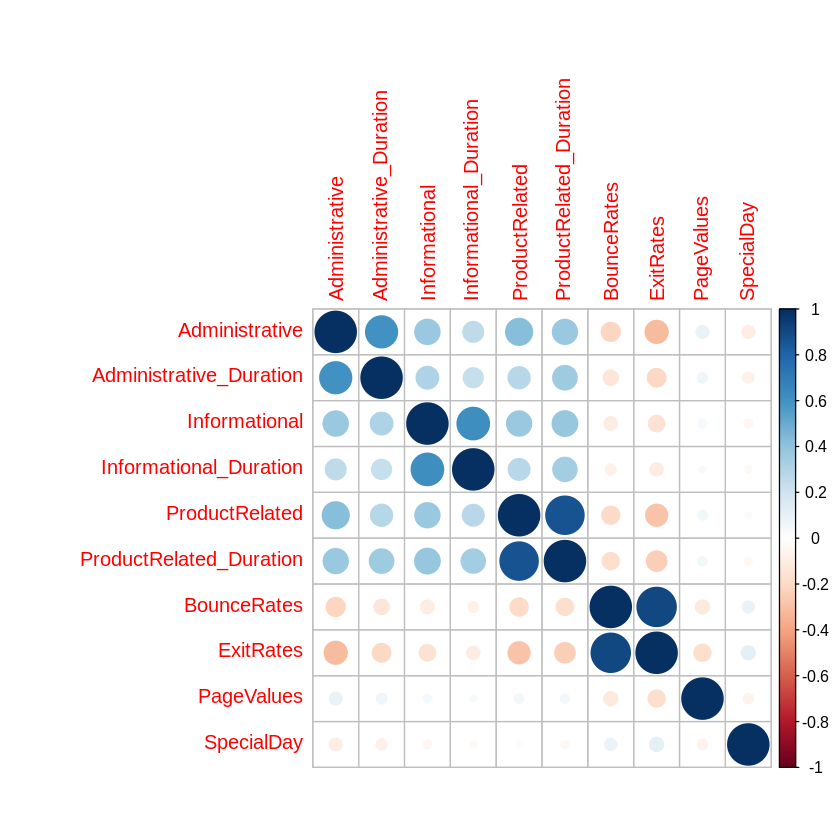

In [23]:
# installing packages that we shall use to plot the correlation plots

install.packages("Hmisc")
library("Hmisc")

install.packages("corrplot")
library(corrplot)

corrplot(numerics.cor)

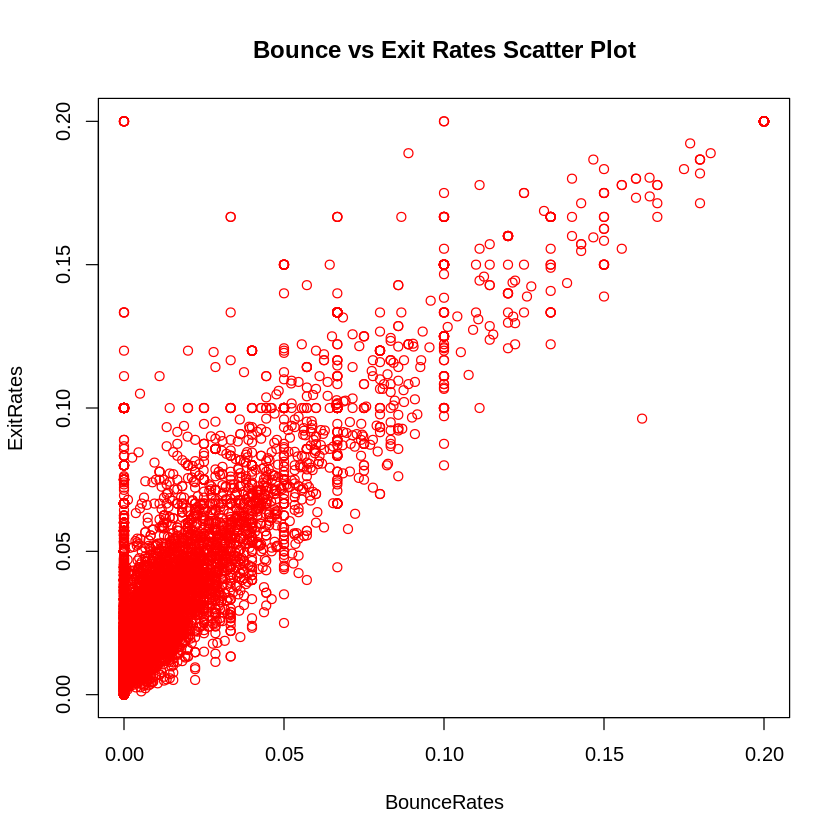

In [24]:
# Plotting a scatter plot using the plot() method

plot(ExitRates ~ BounceRates, data = unique_cust, 
      col = "red",
      main = "Bounce vs Exit Rates Scatter Plot")

There is a strong positive correlation between bounce rates and exit rates

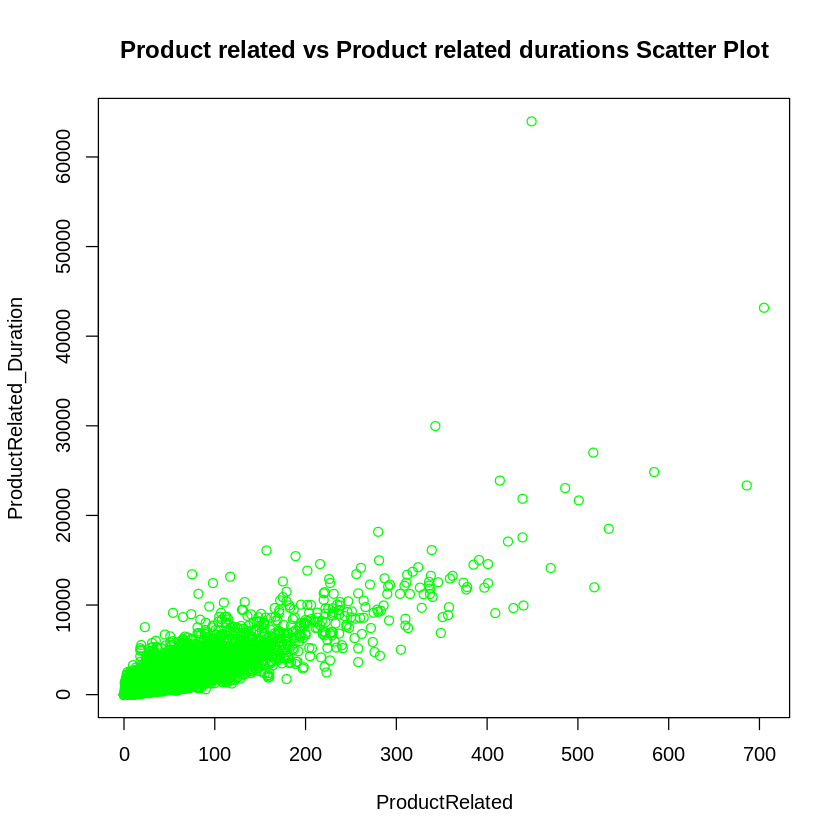

In [25]:
plot(ProductRelated_Duration ~ ProductRelated, data = unique_cust, 
      col = "green",
      main = "Product related vs Product related durations Scatter Plot")

The is a positive correlation between product relation and product relation duration.

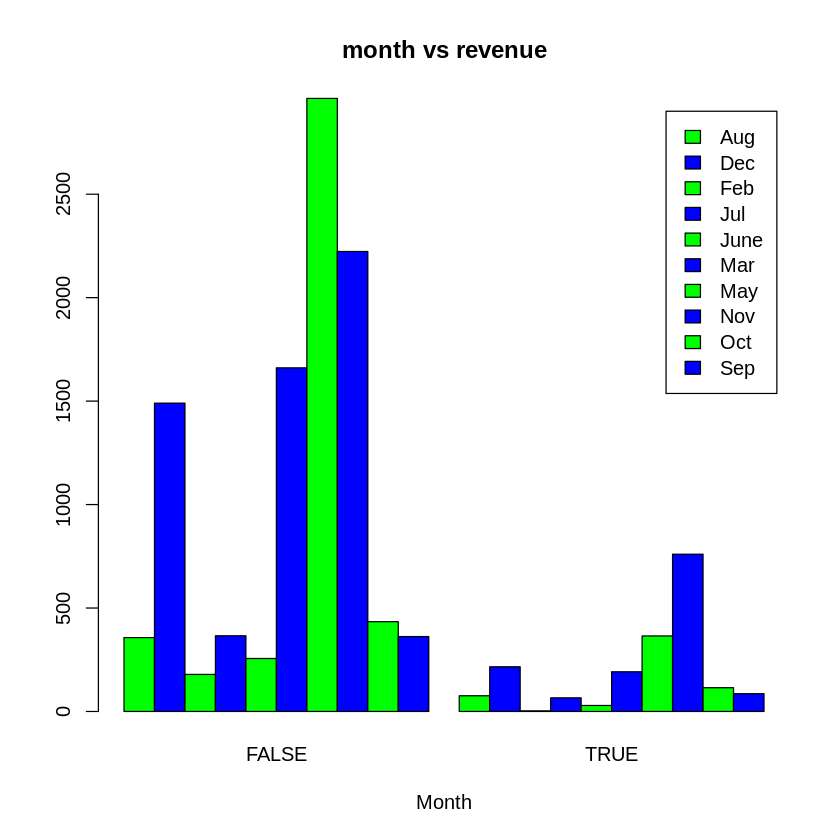

In [26]:
x = unique_cust$Month

y = unique_cust$Revenue

counts <- table(x, y)
barplot(counts, main="month vs revenue",
  xlab="Month", col=c("green","blue"),
  legend = rownames(counts), beside=TRUE)


MODELLING

K-Means Clustering

In [27]:
# Preprocessing the dataset

# converting  some of our columns into numerical datatypes by one hot encoding

# install.packages("caret")
# library(caret)

# d = dummyVars(" ~ .", data = unique_cust)

# encoded = data.frame(predict(d, newdata = unique_cust))

# label encoding needs to be done on some categorical variables.
# storing the numerical attributes in a new variable, then converting them to numerics.
g = c('Month','VisitorType', 'Weekend')
for (i in g){
    unique_cust[,i] = as.numeric(unique_cust[,i])
}




In [28]:
# Since clustering is a type of Unsupervised Learning, we would not require Class Label(output) during execution of our algorithm. We will, therefore, remove Class Attribute “Revenue” and store it in another variable. 

encoded.new <- unique_cust[, -c(18)]
customers.class<- unique_cust[, "Revenue"]
head(encoded.new)


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<dbl>,<dbl>
1,0,0,0,0,1,0.000000,0.20000000,0.2000000,0,0,3,1,1,1,1,3,0
2,0,0,0,0,2,64.000000,0.00000000,0.1000000,0,0,3,2,2,1,2,3,0
3,0,-1,0,-1,1,-1.000000,0.20000000,0.2000000,0,0,3,4,1,9,3,3,0
4,0,0,0,0,2,2.666667,0.05000000,0.1400000,0,0,3,3,2,2,4,3,0
5,0,0,0,0,10,627.500000,0.02000000,0.0500000,0,0,3,3,3,1,4,3,1
6,0,0,0,0,19,154.216667,0.01578947,0.0245614,0,0,3,2,2,1,3,3,0


In [29]:
# Previewing the class column

head(customers.class)

[1] FALSE FALSE FALSE FALSE FALSE FALSE

In [30]:
# Normalizing the dataset so that no particular attribute 
# has more impact on clustering algorithm than others.

normalized <- function(x){
  return ((x-min(x)) / (max(x)-min(x)))
}

In [33]:
# storing the numerical attributes in a new variable, then applying normalisation function.

p = c('Administrative','Administrative_Duration','Informational','Informational_Duration','ProductRelated','ProductRelated_Duration','BounceRates','ExitRates','PageValues','SpecialDay')
for (i in p){
    encoded.new[, i] = normalized(encoded.new[, i]) 
}

Our data now has values ranging from 0 to 1. We will use this normalized data for our modeling.

In [ ]:
# Searching for the optimal number of clusters,k
# Elbow method

# install.packages("factoextra")
# library(factoextra)

# fviz_nbclust(normalized, kmeans, method = "wss") +
#     geom_vline(xintercept = 4, linetype = 2)

In [35]:
# Applying the K-means clustering algorithm with no. of centroids(k)=3

result <- kmeans(encoded.new,3) 


# Previewing the no. of records in each cluster

result$size 

[1] 2360 7810 2029

In [36]:
# Getting the value of cluster center datapoint value(3 centers for k=3)

result$centers 

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
1,0.08661331,0.02365592,0.01945621,0.01218868,0.04271727,0.01786378,0.09189052,0.1937219,0.01698851,0.05550847,6.104661,2.072034,2.371186,6.965678,2.554661,2.664831,0.2355932
2,0.08898373,0.02487567,0.02257256,0.01517729,0.04715722,0.01944985,0.09410970,0.2004718,0.01628326,0.06355954,6.151857,2.069014,2.305634,2.003969,2.452369,2.729321,0.2304738
3,0.07781611,0.02295392,0.01794809,0.01188657,0.04219526,0.01793144,0.14553488,0.2504820,0.01649017,0.06338098,6.303598,2.398226,2.545096,3.142928,12.086742,2.723016,0.2464268


In [37]:
# Getting the cluster vector that shows the cluster where each record falls
# ---
# 
result$cluster

1     2     3     4     5     6     7     8     9    10    11    12    13 
    2     2     1     2     2     2     2     2     2     2     2     2     2 
   14    15    16    17    18    19    20    21    22    23    24    25    26 
    2     2     1     2     2     2     2     1     2     2     2     2     1 
   27    28    29    30    31    32    33    34    35    36    37    38    39 
    2     2     2     2     1     1     2     2     2     1     2     1     2 
   40    41    42    43    44    45    46    47    48    49    50    51    52 
    2     1     2     2     2     2     2     2     2     2     2     2     2 
   53    54    55    56    57    58    59    60    61    62    63    64    65 
    2     2     2     2     2     2     1     2     2     2     2     1     2 
   66    67    68    69    70    71    72    73    74    75    76    77    78 
    2     2     1     2     2     2     1     2     2     2     2     2     2 
   79    80    81    82    83    84    85    86    87    88    89    90    91 
    2     2     2     2     2     2     2     2     2     2     2     2     2 
   92    93    94    95    96    97    98    99   100   101   102   103   104 
    2     2     2     2     2     2     2     2     2     2     1     2     2 
  105   106   107   108   109   110   111   112   113   114   115   116   117 
    2     1     2     2     2     2     2     2     2     2     2     2     2 
  118   119   120   121   122   123   124   125   126   127   128   129   130 
    2     2     1     2     2     2     2     2     2     2     1     1     2 
  131   132   133   134   135   136   137   138   139   140   141   142   143 
    2     2     2     2     2     2     1     2     2     2     1     1     2 
  144   145   146   147   148   149   150   151   152   153   154   155   156 
    2     2     2     2     2     2     2     2     2     1     2     2     2 
  157   158   160   161   162   163   164   165   166   167   168   169   170 
    2     2     2     2     2     2     2     2     2     2     2     1     1 
  171   172   173   174   175   176   177   178   180   181   182   183   184 
    2     2     2     2     1     2     1     2     1     1     2     2     2 
  185   186   187   188   189   190   191   192   193   194   195   196   197 
    3     2     2     1     1     2     2     2     2     2     1     2     2 
  198   199   200   201   202   203   204   205   206   207   208   209   210 
    2     1     2     1     3     2     3     3     1     2     1     1     2 
  211   212   213   214   215   216   217   218   219   220   221   222   223 
    2     2     3     1     2     2     1     2     2     3     1     2     2 
  224   225   226   227   228   229   230   231   232   233   234   235   236 
    3     2     3     2     2     2     2     3     2     2     2     2     2 
  237   238   239   240   241   242   243   244   245   246   247   248   249 
    3     2     2     2     2     2     1     2     2     2     1     2     2 
  250   251   252   253   254   255   256   257   258   259   260   261   262 
    2     1     2     2     2     1     2     2     1     2     3     1     1 
  263   264   265   266   267   268   269   270   271   272   273   274   275 
    2     2     1     2     1     3     2     2     2     2     3     2     3 
  276   277   278   279   280   281   282   283   284   285   286   287   288 
    1     2     1     2     2     2     3     2     2     1     2     2     2 
  289   290   291   292   293   294   295   296   297   298   299   300   301 
    1     3     1     2     2     2     2     2     2     2     1     2     3 
  302   303   304   305   306   307   308   309   310   311   312   313   314 
    2     2     1     2     2     2     2     3     3     3     2     2     2 
  315   316   317   318   319   320   321   322   323   324   325   326   327 
    1     2     2     3     2     2     1     2     1     2     1     2     2 
  328   329   330   331   332   333   334   335   336 

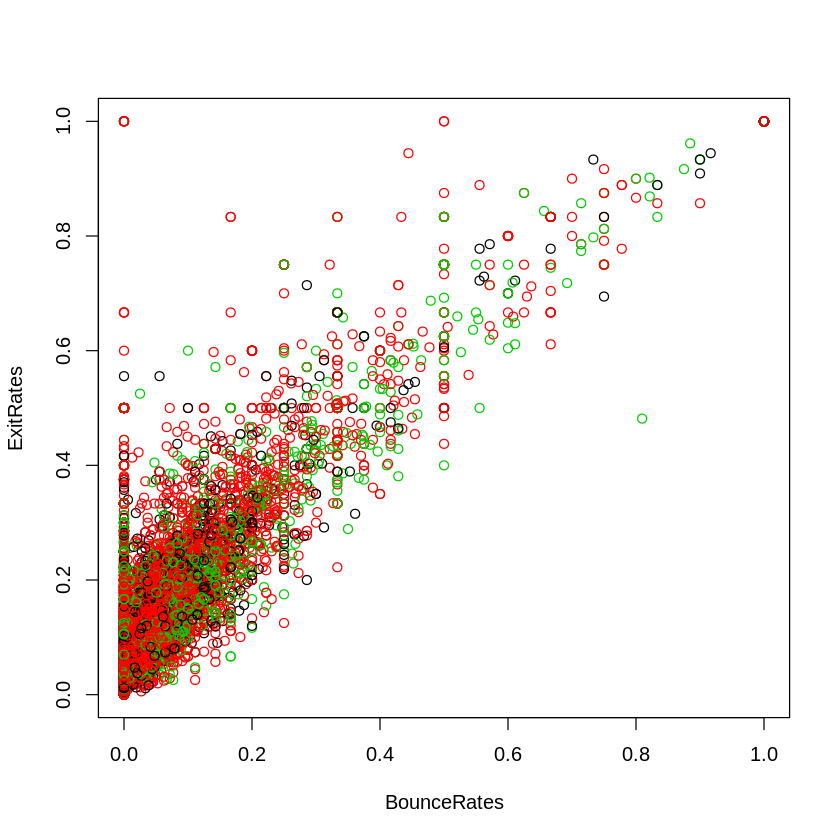

In [38]:
# Plotting to see how exit rates and bounce rates data points have been distributed in clusters

plot(encoded.new[c(7,8)], col = result$cluster)

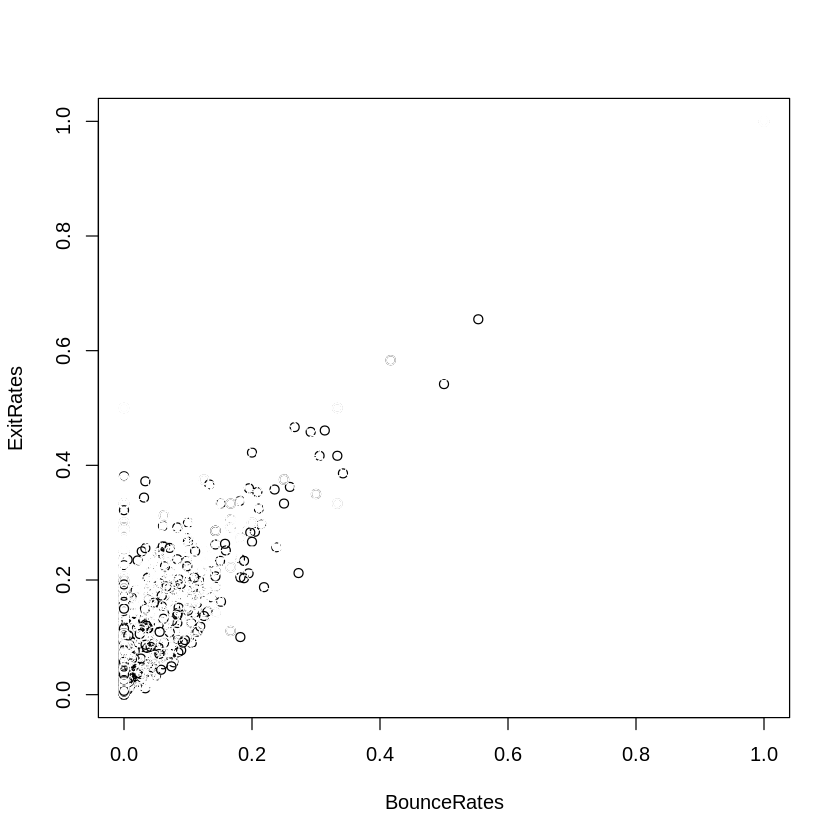

In [39]:
# Plotting to see how exit rates and bounce rates data points have been distributed originally as per "class" attribute in dataset

plot(encoded.new[c(7,8)], col = customers.class)

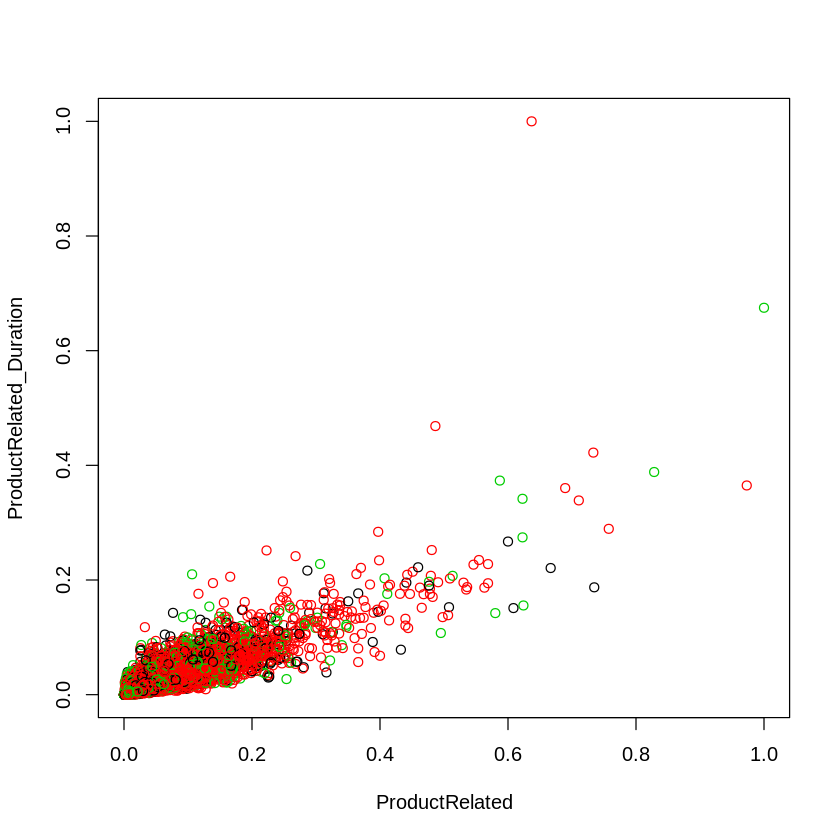

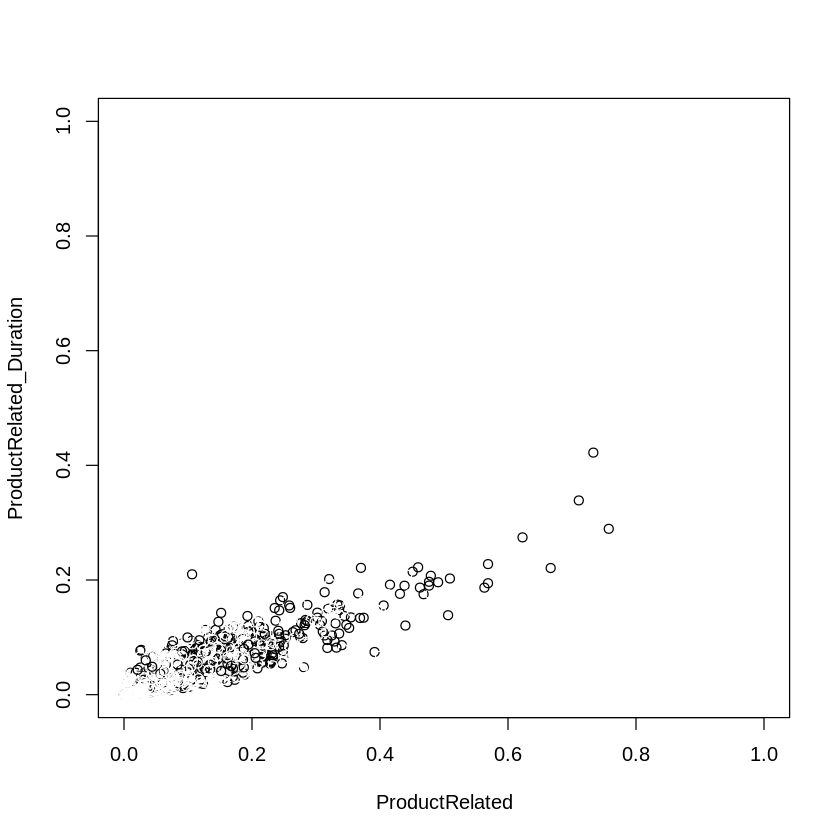

In [40]:
# Plotting to see how product related and product related duration data points have been distributed in clusters
# ---
# 
plot(encoded.new[c(5,6)], col = result$cluster)
plot(encoded.new[c(5,6)], col = customers.class)

In [41]:
#  converting the class variable to numeric

class <- as.numeric(customers.class)
table(result$cluster, class)

   class
       0    1
  1 2000  360
  2 6581 1229
  3 1710  319

In [42]:
# Printing the Accuracy

mean(class == result$cluster)

[1] 0.02951062

We have an accuracy of 3% which means our model is behaving poorly.

Hierarchical Clustering

In [43]:
# Since we already have our data normalized, we will go ahead and start off by calculating the euclidean distance.

distance <- dist(encoded.new, method = "euclidean")
# distance
# print(distance, digits = 3)

In [44]:
# using the hclust clustering method.
h_model <- hclust(distance, method = "ward.D2" )

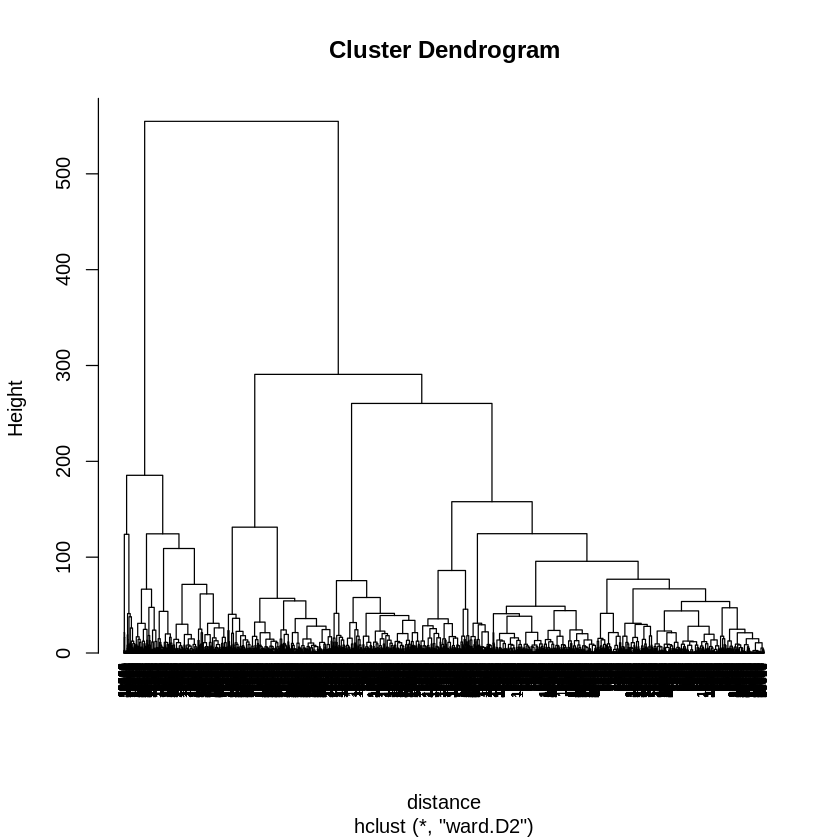

In [45]:
# plotting the dendogram
plot(h_model, cex = 0.6, hang = -1)

In [46]:
# Cut tree into 2 groups.
sub = cutree (h_model, k = 3)
table (sub)

sub
   1    2    3 
8217 2007 1975 

In [47]:
table (sub, class)

   class
sub    0    1
  1 6849 1368
  2 1753  254
  3 1689  286

In [48]:
#checking accuracy
mean(sub == class)

[1] 0.1121403

The accuracy has improved to 11% even though it still is performing poorly.